In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data  = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [4]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


In [9]:
countries = data['CountryName'].unique().tolist()

In [11]:
len(countries)

247

In [12]:
country_code = data['CountryCode'].unique().tolist()
len(country_code)

247

In [13]:
indicators = data['IndicatorCode'].unique().tolist()
len(indicators)

1344

In [14]:
years = data['Year'].unique().tolist()
len(years)

56

# Basic plotting

In [15]:
co2_text = 'CO2 emissions \(metric'
country_text = 'USA'

In [18]:
mask1 = data['IndicatorName'].str.contains(co2_text)
mask2 = data['CountryCode'].str.contains(country_text)

stage = data[mask1 & mask2]

In [19]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


In [25]:
year = stage['Year'].values
co2_lvl = stage['Value'].values
len(year), len(co2_lvl)

(52, 52)

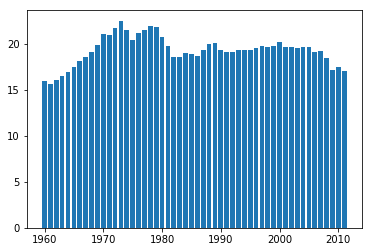

In [26]:
plt.bar(year, co2_lvl)
plt.show()

### Line plot

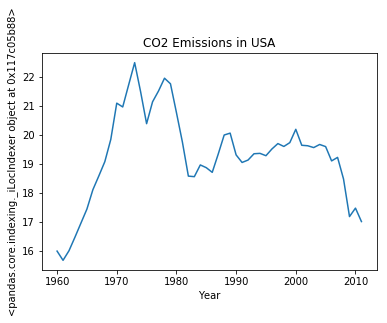

In [27]:
plt.plot(year, co2_lvl)

# labels
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc(0))

plt.title('CO2 Emissions in USA')

plt.show()

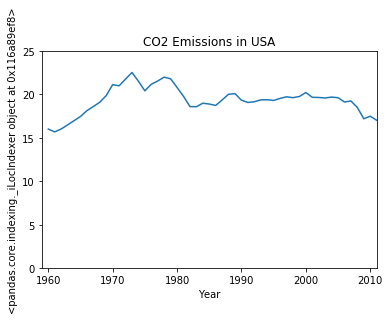

In [34]:
plt.plot(year, co2_lvl)

# labels
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc(0))

plt.title('CO2 Emissions in USA')

# As y axisis not starting from 0 (starting at 15), specify it explicitly
plt.axis([1959, 2011, 0, 25])

plt.show()

## Histograms

In [36]:
hist_data = stage['Value'].values
len(hist_data)

52

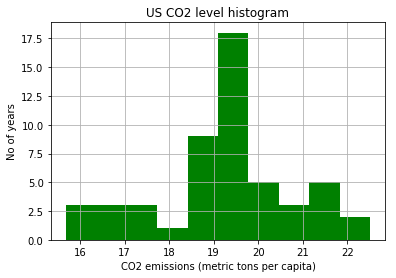

In [40]:
plt.hist(hist_data, bins=10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('No of years')
plt.title('US CO2 level histogram')

plt.grid(True)
plt.show()

## US vs other countries

In [41]:
co2_year = 2011

In [43]:
mask1 = data['IndicatorName'].str.contains(co2_text)
mask2 = data['Year'].isin([co2_year])

In [44]:
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [45]:
len(co2_2011)

232

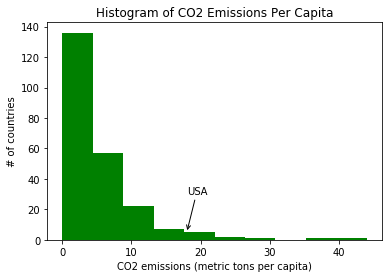

In [55]:
fig, ax = plt.subplots() # subplots returns a touple with the figure, axis attributes.

ax.annotate("USA", 
            xy=(18, 5), xycoords='data', 
            xytext=(18, 30), textcoords='data', 
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"))

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of countries')

plt.title('Histogram of CO2 Emissions Per Capita')

plt.show()
